###  Importing Data & Library's :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Qube Asia\archive (60)\Amazon Sale Report.csv", low_memory= False)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


### Data Cleaning

In [4]:
df.shape

(128975, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [8]:
df['ship-country'].fillna(df['ship-country'].mode()[0], inplace = True)
df['ship-country'].value_counts()

ship-country
IN    128975
Name: count, dtype: int64

In [9]:
df['ship-city'].fillna(df['ship-city'].mode()[0], inplace = True)
df['ship-city'].value_counts()

ship-city
BENGALURU                                      11250
HYDERABAD                                       8074
MUMBAI                                          6126
NEW DELHI                                       5795
CHENNAI                                         5421
                                               ...  
Khandavalli, peravali mandal, west godavari        1
Bhayander west                                     1
JAKHALMANDI                                        1
Arariya                                            1
Halol                                              1
Name: count, Length: 8955, dtype: int64

In [10]:
df['ship-state'].fillna(df['ship-state'].mode()[0], inplace = True)
df['ship-state'].value_counts()

ship-state
MAHARASHTRA               22293
KARNATAKA                 17326
TAMIL NADU                11483
TELANGANA                 11330
UTTAR PRADESH             10638
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
orissa                        1
Name: count, Length: 69, dtype: int64

In [11]:
df['ship-postal-code'].fillna(df['ship-postal-code'].mode()[0], inplace = True)
df['ship-postal-code'].value_counts()

ship-postal-code
201301.0    1039
122001.0     688
560037.0     632
560068.0     619
560076.0     581
            ... 
144006.0       1
829108.0       1
263637.0       1
815353.0       1
629152.0       1
Name: count, Length: 9459, dtype: int64

In [12]:
df['Courier Status'].fillna(df['Courier Status'].mode()[0], inplace = True)
df['Courier Status'].value_counts()

Courier Status
Shipped      116359
Unshipped      6681
Cancelled      5935
Name: count, dtype: int64

In [13]:
df['currency'].fillna(df['currency'].mode()[0], inplace = True)
df['currency'].value_counts()

currency
INR    128975
Name: count, dtype: int64

In [14]:
df['fulfilled-by'].fillna("Amazon service",inplace = True)
df['fulfilled-by'].value_counts()

fulfilled-by
Amazon service    89698
Easy Ship         39277
Name: count, dtype: int64

In [15]:
del df['promotion-ids'] 
del df['Unnamed: 22']      ### Not useful and lots of missing values

<Axes: >

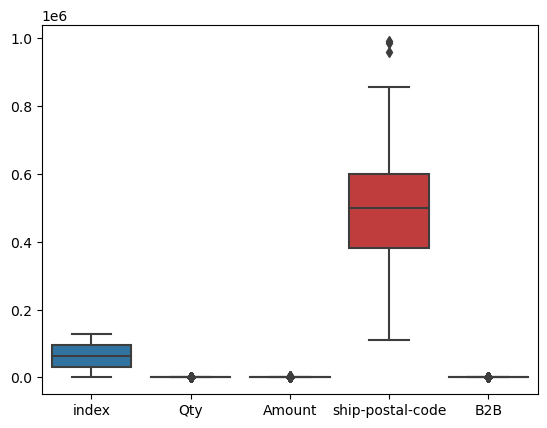

In [16]:
sns.boxplot(df)

In [17]:
df['Amount'].fillna(df['Amount'].median(),inplace = True)
df['Amount'].value_counts()

Amount
605.00     7903
399.00     5442
771.00     2797
735.00     2436
0.00       2343
           ... 
296.19        1
611.43        1
757.14        1
1797.00       1
639.00        1
Name: count, Length: 1410, dtype: int64

In [18]:
# Mapping status values to desired categories
category_mapping = {
    'Shipped': ['Shipped', 'Shipped - Delivered to Buyer', 'Shipped - Returned to Seller',
                'Shipped - Picked Up', 'Shipped - Returning to Seller',
                'Shipped - Out for Delivery', 'Shipped - Rejected by Buyer',
                'Shipped - Lost in Transit', 'Shipped - Damaged', 'Shipping'],
    'Cancelled': ['Cancelled'],
    'Pending': ['Pending', 'Pending - Waiting for Pick Up']
}

# Function to map status values to categories
def map_status(status):
    for category, statuses in category_mapping.items():
        if status in statuses:
            return category
    return None  # If status doesn't match any category

# Apply mapping function to create a new column 'category'
df['Status_category'] = df['Status'].apply(map_status)

In [19]:
df.isna().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
Status_category       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  Amount              128975 non-nul

In [21]:
df.to_csv("new.csv",index=False)

In [22]:
for i in df:
    print(df[i].value_counts())

index
0         1
85979     1
85992     1
85991     1
85990     1
         ..
42986     1
42985     1
42984     1
42983     1
128974    1
Name: count, Length: 128975, dtype: int64
Order ID
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
403-2697348-7766749     1
405-0271223-6692335     1
406-7498475-4257161     1
402-2493916-3621929     1
408-7436540-8728312     1
Name: count, Length: 120378, dtype: int64
Date
05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
            ... 
06-23-22    1090
06-24-22    1028
06-25-22    1026
06-29-22     658
03-31-22     171
Name: count, Length: 91, dtype: int64
Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Wa

In [23]:
df['Status'].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [24]:
df['Status_category']

0         Cancelled
1           Shipped
2           Shipped
3         Cancelled
4           Shipped
            ...    
128970      Shipped
128971      Shipped
128972      Shipped
128973      Shipped
128974      Shipped
Name: Status_category, Length: 128975, dtype: object

In [25]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,128975.000000,128975.000000
mean,64487.000000,0.904431,645.928694,463899.030052
std,37232.019822,0.313354,272.778829,191498.352590
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,459.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,771.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '405-8078784-5731545'

In [ ]:
# Distribution of categorical variables
categorical_cols = ['Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'currency', 'ship-country', 'fulfilled-by']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
sns.countplot(df['Category'])

In [ ]:
# Distribution of numerical variables
numerical_cols = ['Qty', 'Amount']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Pairplot for numeric variables
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show()

# Count plot for categorical variables
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# # Distribution plot of 'Amount'
# plt.figure(figsize=(10, 6))
# sns.distplot(df['Amount'], kde=True, bins=30, color='blue')
# plt.title('Distribution of Amount')
# plt.xlabel('Amount')
# plt.ylabel('Density')
# plt.show()


In [ ]:
# Boxplot of 'Amount' by 'Sales Channel'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sales Channel', y='Amount')
plt.title('Boxplot of Amount by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Amount')
plt.show()



In [ ]:
# Histogram of 'Qty'
plt.figure(figsize=(10, 6))
plt.hist(df['Qty'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Qty')
plt.xlabel('Qty')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# QQ plot for 'Amount'
plt.figure(figsize=(10, 6))
stats.probplot(df['Amount'], dist="norm", plot=plt)
plt.title('QQ Plot of Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()



In [ ]:
# Interactive scatter plot using Plotly
fig = px.scatter(df, x='Qty', y='Amount', color='Status', hover_data=['Sales Channel', 'Fulfilment'])
fig.update_layout(title='Interactive Scatter Plot of Qty vs Amount')
fig.show()